# EDA To Prediction (DieTanic)
원본 노트북: https://www.kaggle.com/ash316/eda-to-prediction-dietanic   
대회: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

## Part1: Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/titanic/data'
os.listdir(data_dir)

['test.csv', 'train.csv', 'gender_submission.csv']

In [3]:
data = pd.read_csv(data_dir + '/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Survived - Target

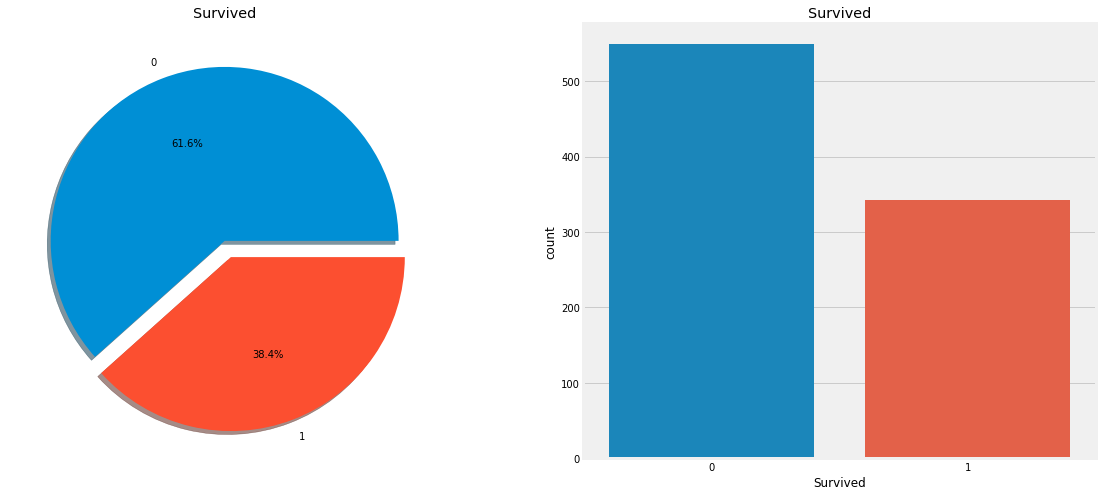

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

총 891명의 승객 중 약 350명(38.4%)만 생존했다.  
어떤 변수들이 생존 여부와 관련이 있을지 탐색해본다.

### Sex - Categorical Feature

In [9]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

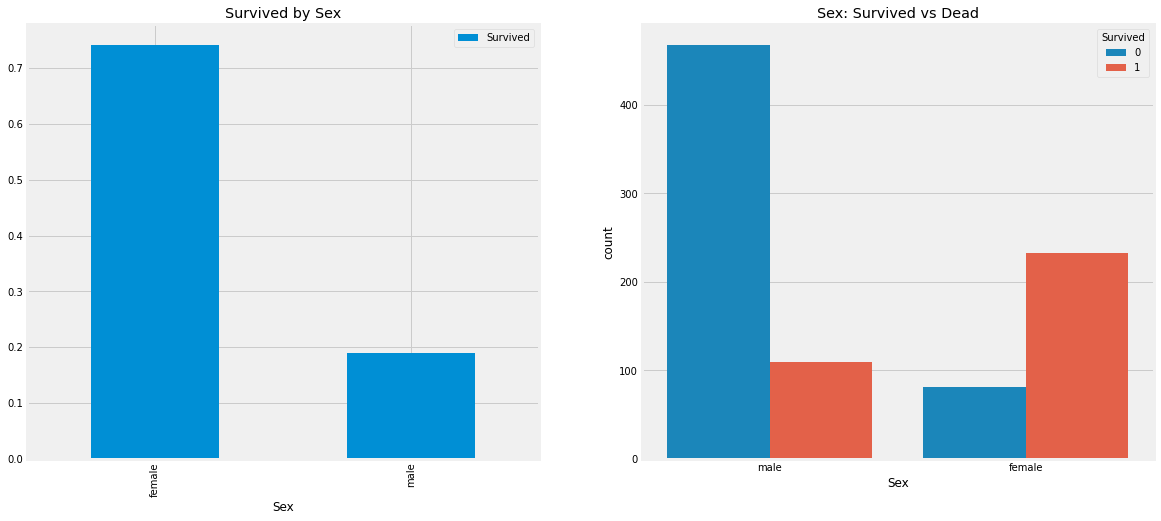

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived by Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

남성보다 여성의 생존율이 훨씬 높다.

### Pclass - Ordinal Feature

In [11]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


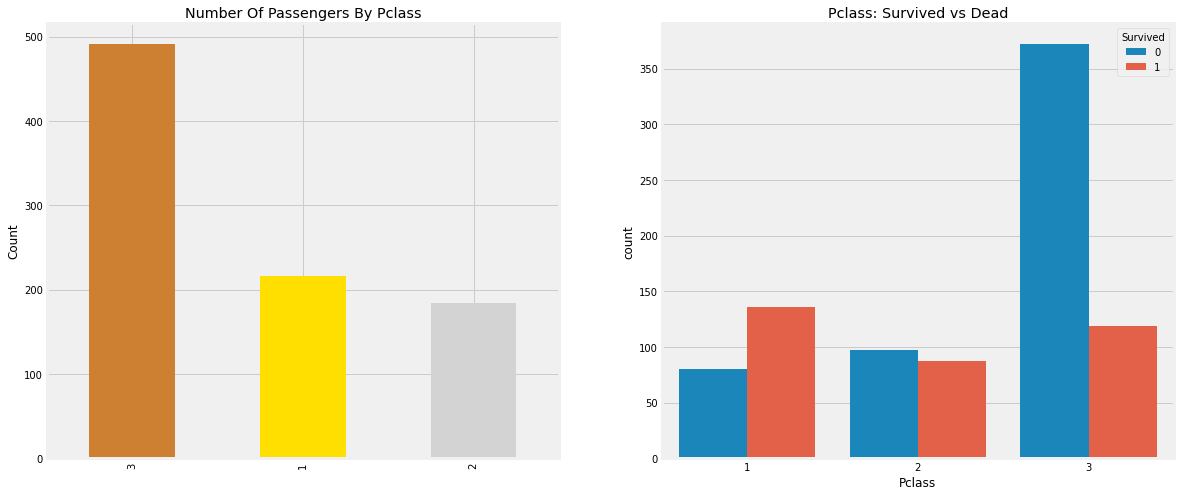

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

Pclass 등급이 높을수록 생존율이 높다.  
Sex와 Pclass를 함께 고려하여 생존율을 분석해본다.

In [13]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

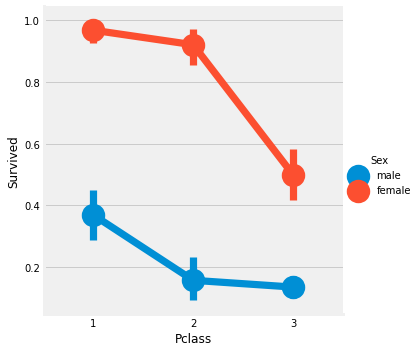

In [14]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

Pclass 1의 여성은 대부분 생존했다. 

### Age - Continous Feature

In [15]:
print(f"Oldest Passenger was of: {data['Age'].max()} Years")
print(f"Oldest Passenger was of: {data['Age'].min()} Years")
print(f"Oldest Passenger was of: {data['Age'].mean()} Years")

Oldest Passenger was of: 80.0 Years
Oldest Passenger was of: 0.42 Years
Oldest Passenger was of: 29.69911764705882 Years


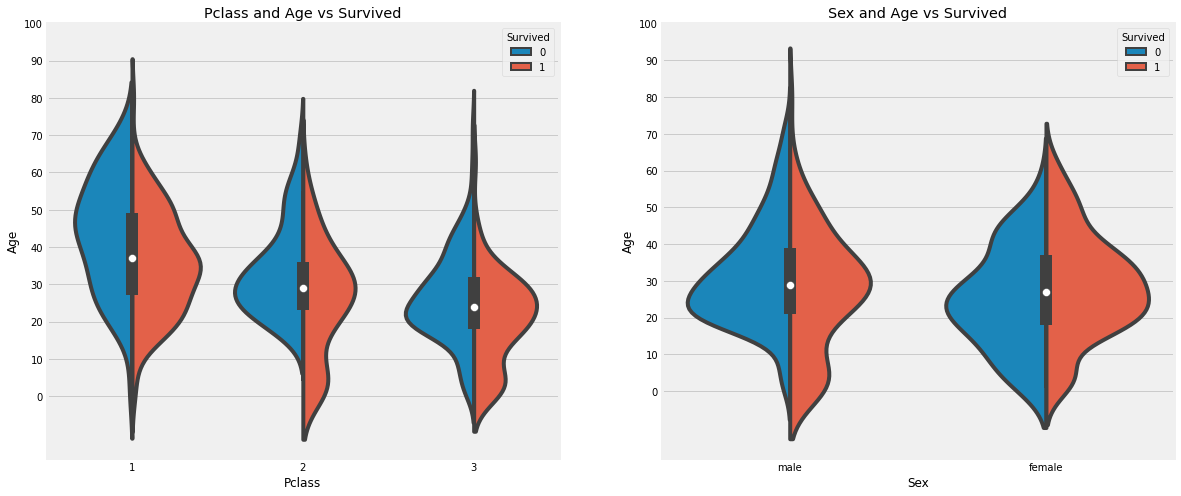

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- Pclass가 낮을수록 아동 수는 증가하고, 10세 미만 아동의 생존율은 Pclass에 관계 없이 높은 편이다.
- Pclass 1의 20-50세 승객은 생존 가능성이 높으며 여성의 경우 훨씬 더 높다.
- 남성의 경우 연령이 증가함에 따라 생존 가능성이 감소한다.

#### Filling NaN Ages
Age에는 177개의 결측치가 있는데, 이것을 단순히 평균 나이로 채우는 것은 좋지 않은 방법이다.   
따라서 이름에 붙는 Mr, Mrs 등의 접두어로 승객을 그룹화하고 각 그룹별 평균 나이로 채우는 방법을 시도해본다.

In [17]:
# 이름에서 접두어 추출
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [18]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [19]:
# 일반적인 접두어로 대체
data['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'], 
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], 
    inplace=True)

In [20]:
# 접두어 그룹별 평균 나이
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [21]:
# 그룹별 평균 나이를 반올림한 값으로 결측치 채우기
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [22]:
data.Age.isnull().any()

False

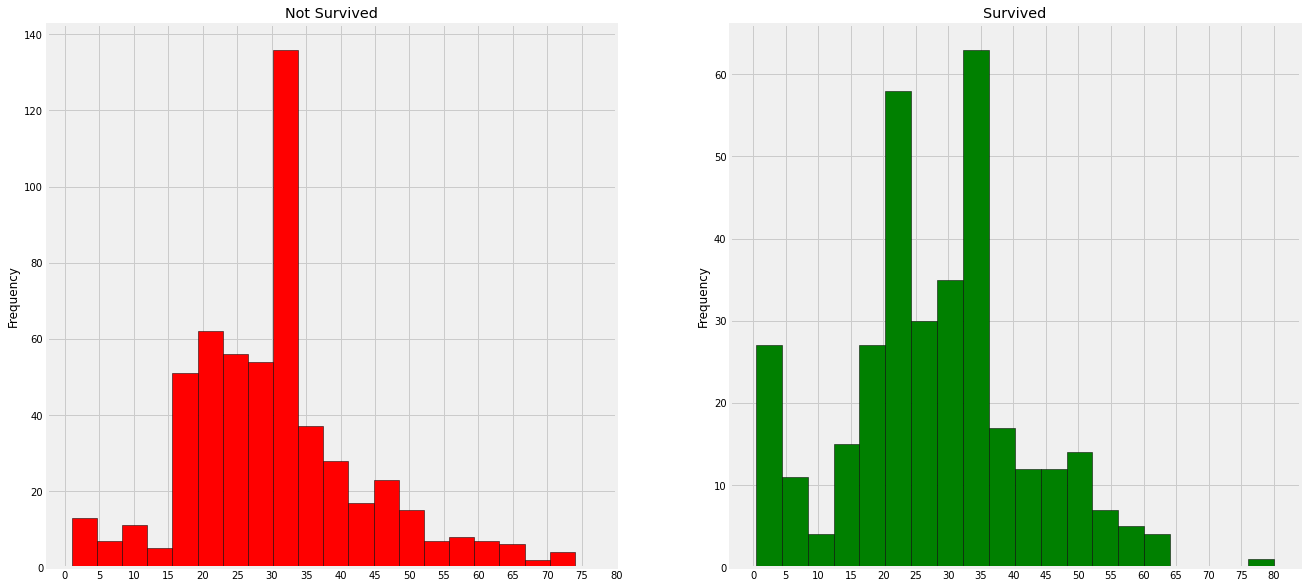

In [23]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, color='red', edgecolor='black')
ax[0].set_title('Not Survived')
ax[0].set_xticks(list(range(0, 85, 5)))

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, color='green', edgecolor='black')
ax[1].set_title('Survived')
ax[1].set_xticks(list(range(0, 85, 5)))
plt.show()

- 5세 미만 유아가 많이 생존했다.
- 80세의 최고령 승객이 구출되었다.
- 30~40세 승객이 가장 많이 사망했다.

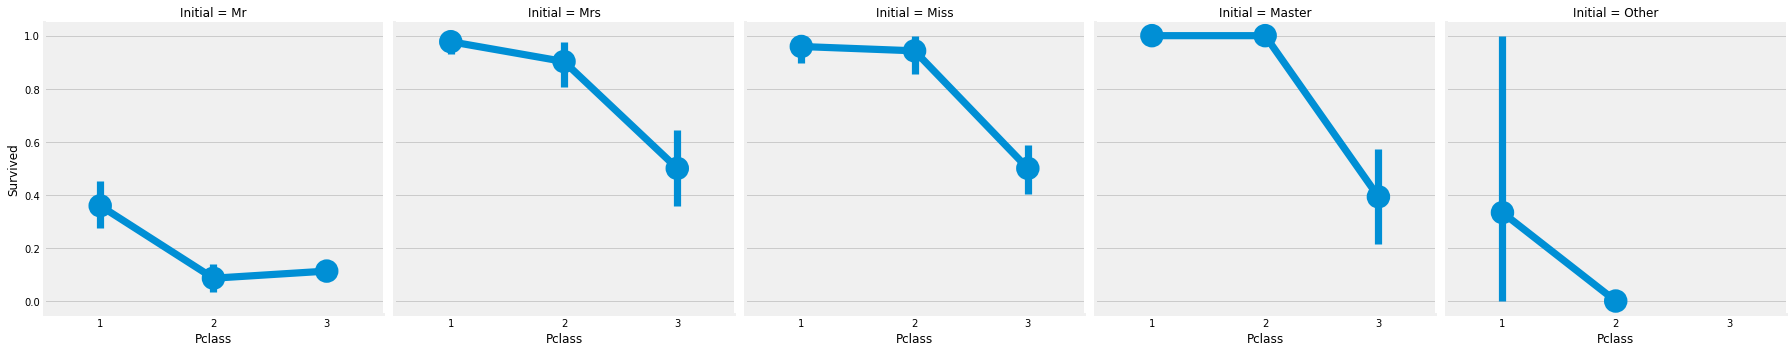

In [24]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

여성 및 아동 우선 구조정책은 Pclass와 관계 없이 유효하다.

### Embarked - Categorical Feature

In [25]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

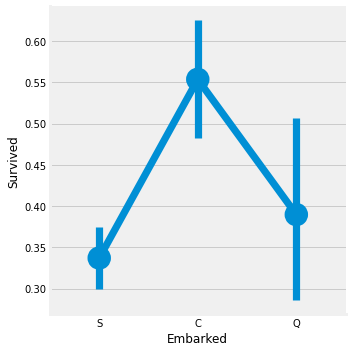

In [26]:
sns.factorplot('Embarked', 'Survived', data=data)
plt.show()

Port C의 생존율이 0.55 정도로 가장 높고 S가 가장 낮다.

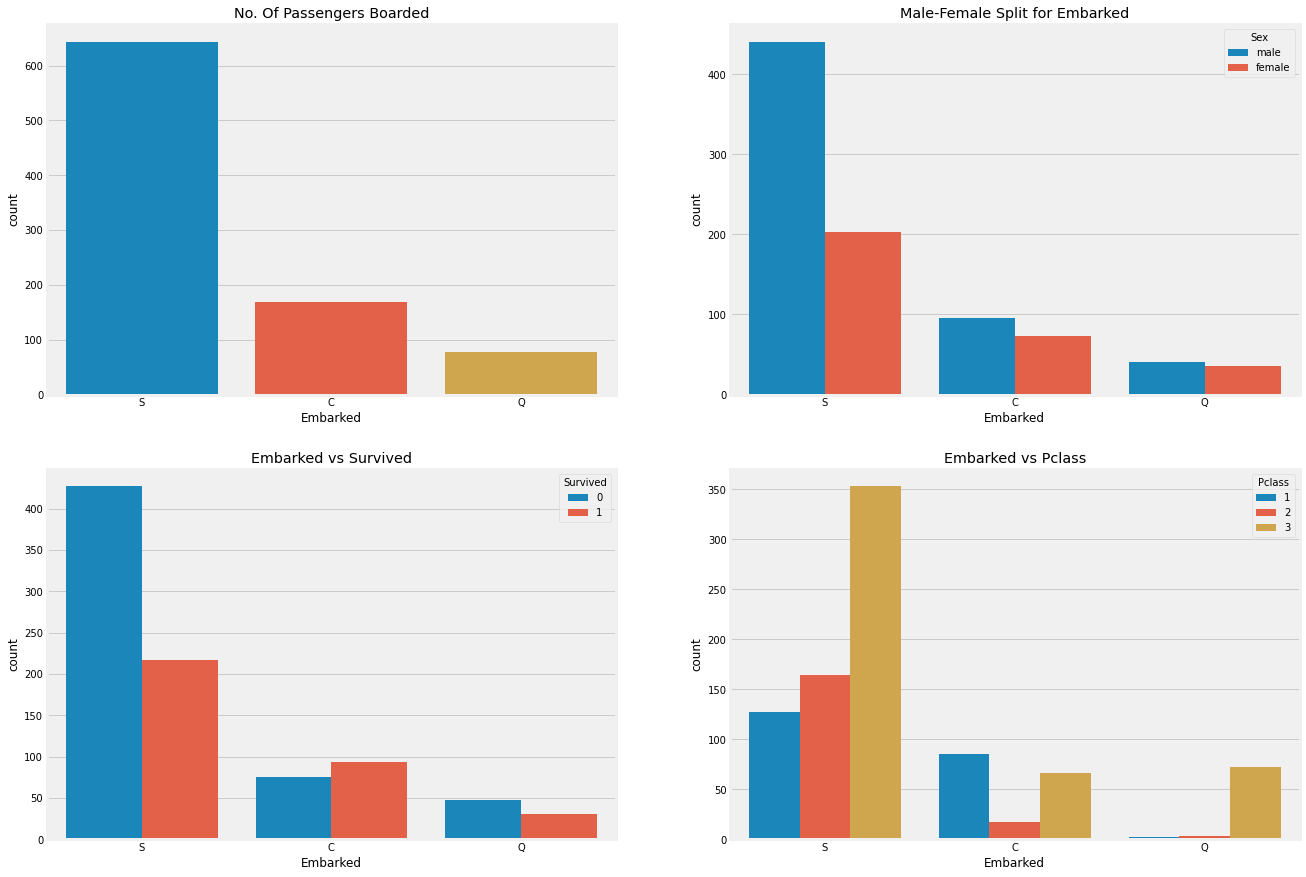

In [27]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.show()

- S 항구에서 가장 많은 승객이 탑승했고, Pclass 3의 비율이 높아 사망자의 비율도 높다.
- C 항구에서 탑승한 승객 중 상당 수가 생존했고, Pclass 1, 2의 비율이 높기 때문인 것으로 추정된다.
- Q 항구의 승객은 대부분 Pclass 3이다.

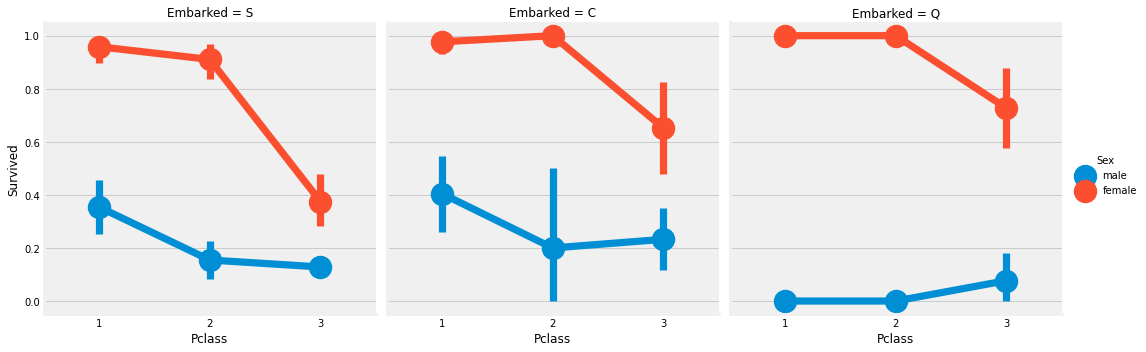

In [28]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

- Pclass 1과 Pclass 2의 생존율은 여성의 경우 거의 1에 가깝다.
- S 항구의 탑승객은 Pclass 3이 많아서 남녀 모두 생존율이 낮은 편이다.
- Q 항구의 탑승객은 대부분 Pclass 3이어서 남성의 생존율이 특히 낮다.

#### Filling Embarked NaN
Embarked는 결측치가 2개뿐이므로 승객이 가장 많이 탑승한 S 항구로 결측치를 채운다.


In [29]:
data['Embarked'].fillna('S', inplace=True)

In [30]:
data.Embarked.isnull().any()

False

### SibSp - Discrete Feature
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife

In [31]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


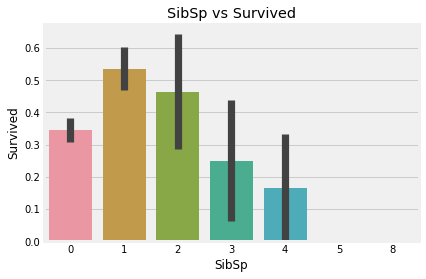

In [32]:
sns.barplot('SibSp', 'Survived', data=data)
plt.title('SibSp vs Survived')
plt.show()

In [33]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- SibSp가 많을수록 생존율이 감소한다.
- SibSp가 5명 이상인 사람들은 모두 사망했다.
- SibSp가 4명 이상인 경우는 모두 Pclass 3에 있으므로 Pclass의 영향으로 보인다.

### Parch - Discrete Feature
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson

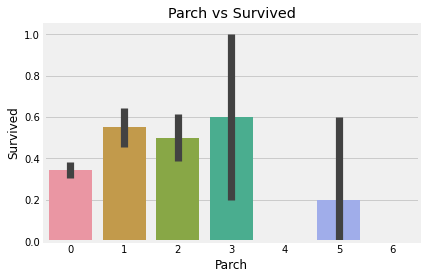

In [34]:
sns.barplot('Parch', 'Survived', data=data)
plt.title('Parch vs Survived')
plt.show()

In [35]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


- 대가족은 주로 Pclass 3에 있고 생존율이 낮다.
- 1-2명의 형제/배우자, 또는 1-3명의 부모/자식이 있는 경우 혼자이거나 대가족이 있는 것보다 생존율이 더 높다.

### Fare - Continous Feature

In [36]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


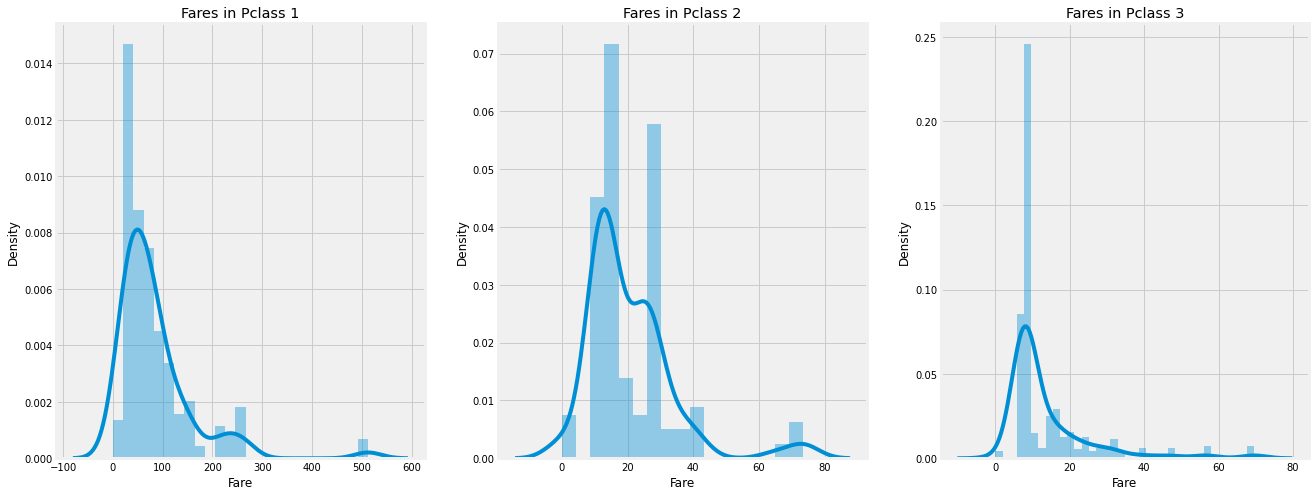

In [37]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass 1 요금의 분산이 가장 크고, Pclass가 낮을수록 분산이 감소한다.

### Correlation Between The Features

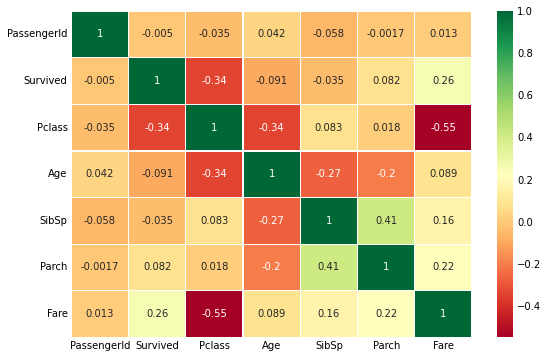

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.show()

feature들 간의 상관관계가 높지 않으므로 다중공선성이 나타나지 않는다.

## Part2: Feature Engineering and Data Cleaning


### Age_band
연속형 변수인 Age를 구간을 나누어 범주형 변수로 변환한다.  
승객의 최고 연령이 80세였으므로 0-80의 범위를 5개의 bin으로 나누면 크기가 16(80/5=16)인 bin이 만들어진다.

In [39]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64,'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [40]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


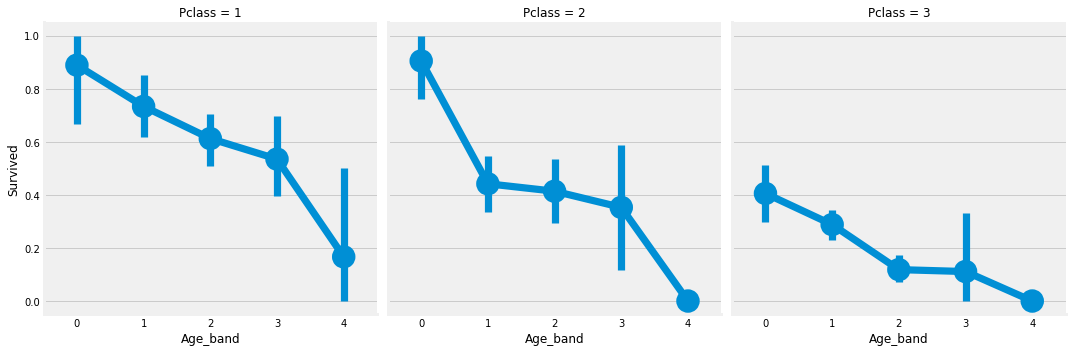

In [41]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

Pclass와 상관없이 연령이 증가할수록 생존율이 감소한다.

### Family_Size and Alone

In [42]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

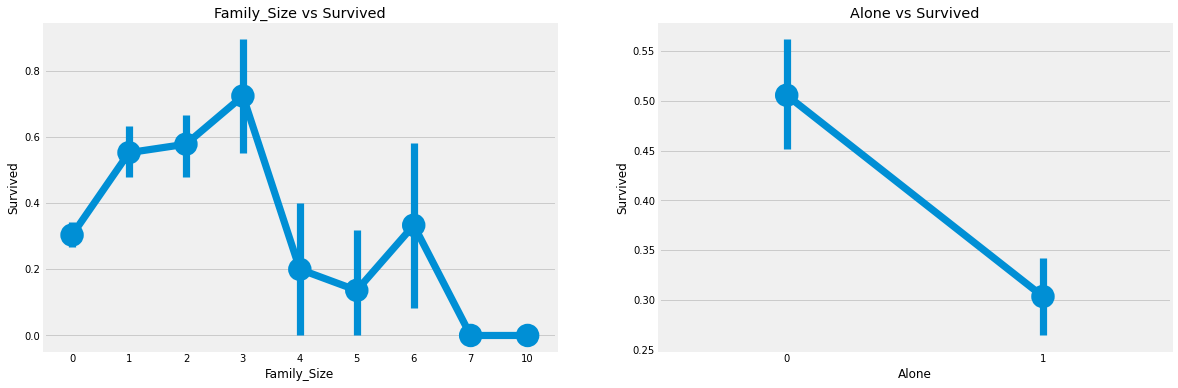

In [43]:
f, ax = plt.subplots(1, 2, figsize=(18,6))
sns.pointplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.pointplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()

혼자 탑승한 승객과 가족이 4명 이상인 승객은 생존율이 낮다.

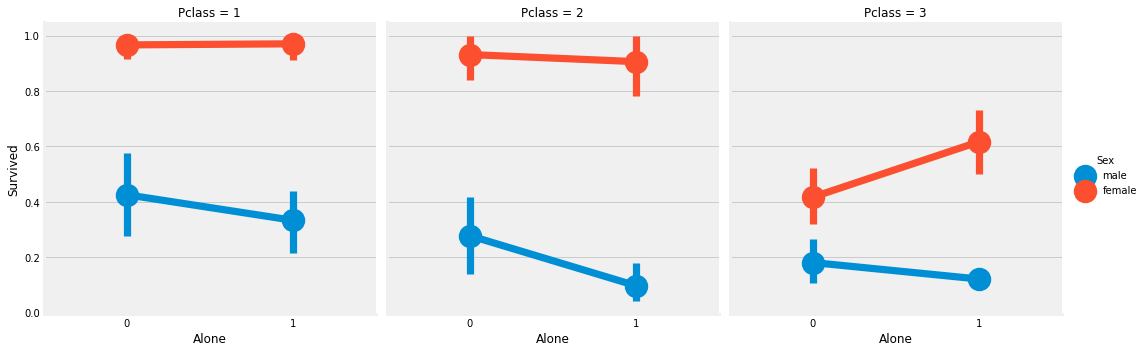

In [44]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

- 성별이나 Pclass와 관계 없이 혼자 탑승한 승객의 생존율이 낮다.
- 예외적으로 Pclass 3에서는 혼자 탑승한 여성이 가족이 있는 여성보다 높은 생존율을 보인다.

### Fare_Range
- `pandas.qcut`을 사용하여 연속형 변수인 Fare를 순서형 변수로 변환한다.
- qcut은 설정된 bin의 개수에 따라 균등한 개수 혹은 범위로 값을 분할한다.

In [45]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


fare range가 높을수록 생존율이 높다.

In [46]:
# 각 범위를 라벨링하여 category로 만든다.
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

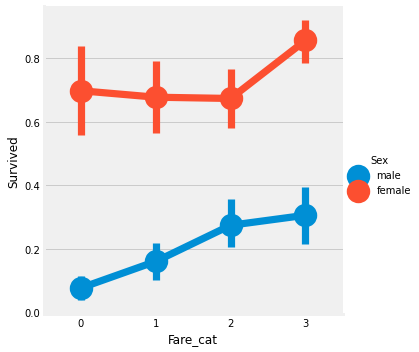

In [47]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

### Converting String Values into Numeric

In [48]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C' ,'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

### Dropping UnNeeded Features
- 불필요한 변수: PassengerId, Name, Ticket, Cabin
- 다른 것으로 대체된 변수: Age, Fare, Fare_Range

In [49]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


In [50]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

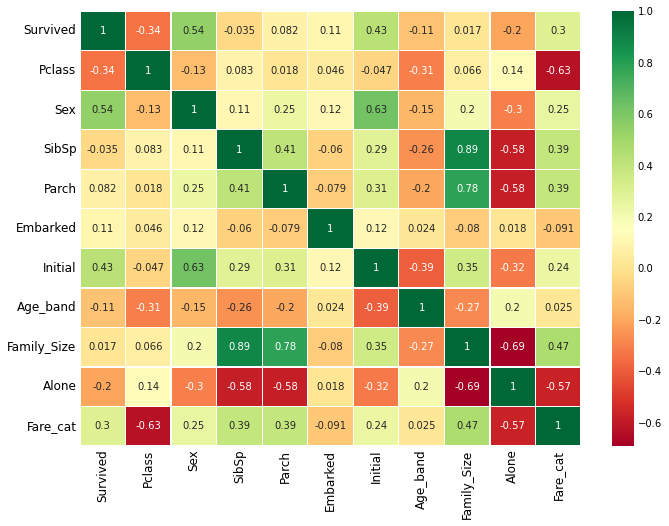

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Part3: Predictive Modeling

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [53]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Random Forests

In [54]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print(metrics.accuracy_score(test_Y, prediction))

0.8097014925373134


### Confusion Matrix

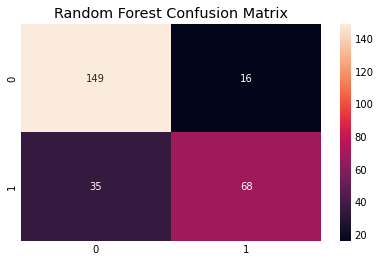

In [55]:
sns.heatmap(confusion_matrix(test_Y, prediction), annot=True, fmt='2.0f')
plt.title('Random Forest Confusion Matrix')
plt.show()

### Hyper-Parameters Tuning

In [56]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   43.6s finished


0.819327098110602
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


### Feature Importance

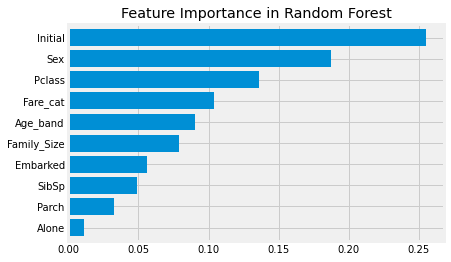

In [59]:
model = RandomForestClassifier(n_estimators=300, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title('Feature Importance in Random Forest')
plt.show()